In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Semantics
An important part of speech is the semantics of words. When we teach a computer to recognize words, does it in fact recognize the concept or just memorize that exact word. Does it know how to relate the words to other ideas, as a human would? So far, no, so our models will get tripped up by things such as similes and homonyms (words spelled the same way but carry different meaning). For the similes, we could make a lemma (root word of a concept) for ideas, for example we could encode milady to be a lemma for lady, but we'd have to apply that to all the words in each use case scenario and we'd have to sift through the entire documents to make sure we got all of them. Not very feasible nor effective. 

This is where unsupervised learning comes in. Instead of teaching the computer to understand every minute difference and relationship of words, we can run unsupervised models, neural nets in particular, in order to have the computer pick up on patterns in words that we feed it so it can learn itself. Then it can use those learned ideas on new sentences. Similar to supervised NLP, the unsupervised model is best fit on the data it was trained on. So if a model is trained on medical data, then it probably won't be effective on say identifying authors who wrote a novel based on the medical lexicon alone and vice versa. 

So far, the next section is gonna focus on Latent semantic analysis.

# Converting Sentences to Vectors

Consider the following sentences:

1. "The best Monty Python sketch is the one about the dead parrot,  I laughed so hard."
2. "I laugh when I think about Python's Ministry of Silly Walks sketch, it is funny, funny, funny, the best!"
3. "Chocolate is the best ice cream dessert topping, with a great taste."
4. "The Lumberjack Song is the funniest Monty Python bit: I can't think of it without laughing."
5. "I would rather put strawberries on my ice cream for dessert, they have the best taste."
6. "The taste of caramel is a fantastic accompaniment to tasty mint ice cream."

As a human being, it's easy to see that the sentences involve two topics, comedy and ice cream.   One way to represent the sentences is in a term-document matrix, with a column for each sentence and a row for each word.  Ignoring the stop words 'the', 'is','and', 'a', 'of,','I', and 'about,', discarding words that occur only once, and reducing words like 'laughing' to their root form ('laugh'), the term-document matrix for these sentences would be:

|           | 1 | 2 | 3 | 4 | 5 | 6 |
|-----------|---|---|---|---|---|---|
| Monty     | 1 | 0 | 0 | 1 | 0 | 0 |
| Python    | 1 | 1 | 0 | 1 | 0 | 0 |
| sketch    | 1 | 1 | 0 | 0 | 0 | 0 |
| laugh     | 1 | 1 | 0 | 1 | 0 | 0 |
| funny     | 0 | 3 | 0 | 1 | 0 | 0 |
| best      | 1 | 1 | 1 | 0 | 1 | 0 |
| ice cream | 0 | 0 | 1 | 0 | 1 | 1 |
| dessert   | 0 | 0 | 1 | 0 | 1 | 0 |
| taste     | 0 | 0 | 1 | 0 | 1 | 2 |

For reference, 'document' in this case can refer to any form of text, whether that be a sentence, paragraph, or whole essays. Also in this case, the matric has the features of bag of words as rows and the sentences (observations) as columns. 

In the above scenario, the word 'best' shows up in 4 of the 6 sentences and can refer to either topic, making it not so good at distinguishing between the ideas of comedy and ice cream. To avoid this, we have to weight words that show up often as lower as they don't contribute much information. We also want to weight words that show up only once as lower too as they probably don't provide a lot of information either and probably act as noise. We want that sweet spot in the middle so we can weight them higher as they are more indicative of the semantic nature of a topic. The word 'funny' shows up more often in the comedy sentences, making it a good choice as a word to pick out the comedy topic. 

# Quantifying documents: Collection and document frequencies

'Document frequency' counts how many sentences a word appears in.  'Collection frequency' counts how often a word appears, total, over all sentences.  Let's calculate the df and cf for our sentence set:

|           |df |cf| 
|-----------|---|---|
| Monty     | 2 | 2 | 
| Python    | 3 | 3 | 
| sketch    | 2 | 2 | 
| laugh     | 3 | 3 | 
| funny     | 2 | 4 | 
| best      | 4 | 4 | 
| ice cream | 3 | 3 | 
| dessert   | 2 | 2 | 
| taste     | 3 | 4 | 

# Penalizing Indiscriminate Words: Inverse Document Frequency

Now let's weight the document frequency so that words that occur less often (like 'sketch' and 'dessert') are more influential than words that occur a lot (like 'best').  We will calculate the ratio of total documents (or total number of sentences/num columns) (N) divided by df, then take the log (base 2) of the ratio, to get our inverse document frequency number (idf) for each term (t):

$$idf_t=log \dfrac N{df_t}$$


|           |df |cf| idf |
|-----------|---|---|
| Monty     | 2 | 2 | 1.585 |
| Python    | 3 | 3 | 1 |
| sketch    | 2 | 2 | 1.585 |
| laugh     | 3 | 3 | 1 |
| funny     | 2 | 4 | 1.585 |
| best      | 4 | 4 | .585 |
| ice cream | 3 | 3 | 1 |
| dessert   | 2 | 2 | 1.585 |
| taste     | 3 | 4 | 1 |

The idf weights tell the model to consider 'best' as less important than other terms.  

# Term-frequency weights
The next piece of information to consider for our weights is how frequently a term appears within a sentence.  The word 'funny' appears three times in one sentence- it would be good if we were able to weight 'funny' so that the model knows that. We can accomplish this by creating unique weights for each sentence that combine the term frequency (how often a word appears within an individual document) with the idf, like so:

$$tf-idf_{t,d}=(tf_{t,d})(idf_t)$$

Now the term 'funny' in sentence 2, where it occurs three times, will be weighted more heavily than the term 'funny' in sentence 1, where it only occurs once.  If 'best' had appeared multiple times in one sentence, it would also have a higher weight for that sentence, but the weight would be reduced by the idf term that takes into account that 'best' is a pretty common word in our collection of sentences.

The tf_idf score will be highest for a term that occurs a lot within a small number of sentences, and lowest for a word that occurs in most or all sentences.  

Now we can represent each sentence as a vector made up of the tf-idf scores for each word:

|           | 1     | 2     | 3   | 4   | 5   | 6 |
|-----------|-------|-------|-----|-----|-----|----
| Monty     | 1.585 | 0     |1.585| 0   | 0   | 0
| Python    | 1     | 1     | 0   | 1   | 0   | 0 
| sketch    | 1.585 | 1.585 | 0   | 0   | 0   | 0
| laugh     | 1     | 1     | 0   | 1   | 0   | 0
| funny     | 0     | 4.755 | 0   |1.585| 0   | 0
| best      | .585  | .585  | .585| 0   |.585 | 0
| ice cream | 0     | 0     | 1   | 0   | 1   | 1
| dessert   | 0     | 0     |1.585| 0   |1.585| 0
| taste     | 0     | 0     | 1   | 0   | 2   | 2


In [2]:
import nltk
from nltk.corpus import gutenberg
nltk.download('gutenberg')
nltk.download('punkt')
import re
from sklearn.model_selection import train_test_split

#reading in the data, this time in the form of paragraphs
emma = gutenberg.paras('austen-emma.txt')
#processing
emma_paras=[]
for paragraph in emma:
    para=paragraph[0]
    #removing the double-dash from all words
    para=[re.sub(r'--','',word) for word in para]
    #Forming each paragraph into a string and adding it to the list of strings.
    emma_paras.append(' '.join(para))

print(emma_paras[0:4])

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\sohai\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sohai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['[ Emma by Jane Austen 1816 ]', 'VOLUME I', 'CHAPTER I', 'Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her .']


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(emma_paras, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(emma_paras_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 1948
Original sentence: A very few minutes more , however , completed the present trial .
Tf_idf vector: {'minutes': 0.7127450310382584, 'present': 0.701423210857947}


In [4]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])




Percent variance captured by all components: 45.20953556326308
Component 0:
" Oh !     0.999287
" Oh !     0.999287
" Oh !     0.999287
" Oh !     0.999287
" Oh !"    0.999287
" Oh !     0.999287
" Oh !"    0.999287
" Oh !     0.999287
" Oh !     0.999287
" Oh !     0.999287
Name: 0, dtype: float64
Component 1:
" You have made her too tall , Emma ," said Mr . Knightley .                                                                                                                0.633698
" You get upon delicate subjects , Emma ," said Mrs . Weston smiling ; " remember that I am here . Mr .                                                                     0.582043
" You are right , Mrs . Weston ," said Mr . Knightley warmly , " Miss Fairfax is as capable as any of us of forming a just opinion of Mrs . Elton .                         0.564975
" I do not know what your opinion may be , Mrs . Weston ," said Mr . Knightley , " of this great intimacy between Emma and Harriet Smith , but I

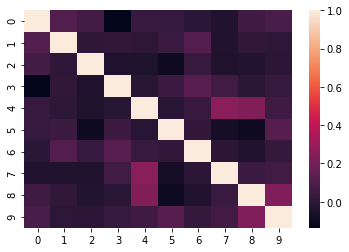

Key:
0 That is _court_ .
1 " Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me ."
2 " How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended .
3 To restrain him as much as might be , by her own manners , she was immediately preparing to speak with exquisite calmness and gravity of the weather and the night ; but scarcely had she begun , scarcely had they passed the sweep - gate and joined the other carriage , than she found her subject cut up  her hand seized  her attention demanded , and Mr . Elton actually making violent love to her : availing himself of the precious opportunity , declaring sentiments which must be already well known , hoping  fearing  adoring  ready to die if she refused him ; but flattering himself that his ardent attachment and unequalled love and unexampled passion could not fail of having some effect , and in short , very much resolved on being

In [5]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])


# Applying to test set

In [8]:
X_test_lsa = lsa.fit_transform(X_test_tfidf)
test_components = pd.DataFrame(X_test_lsa, index=X_test)

for i in range(5):
    print(test_components.loc[:,i].sort_values(ascending=False)[:10])

" Oh no !    0.999922
" Oh no !    0.999922
" Oh !       0.999922
" Oh !       0.999922
" Oh !       0.999922
" Oh !       0.999922
" Oh !       0.999922
" Oh !       0.999922
" Oh !       0.999922
" Oh !       0.999922
Name: 0, dtype: float64
" Well , Mrs . Weston ," said Emma triumphantly when he left them , " what do you say now to Mr . Knightley ' s marrying Jane Fairfax ?"                                                                                                                                                                                                                                                                                                             0.613679
After tea , Mr . and Mrs . Weston , and Mr . Elton sat down with Mr . Woodhouse to cards .                                                                                                                                                                                                                            

The 'Oh' and 'Ah' component remained. The 'Mr. Knightly and Mr. Weston' component also remained, but with variations on some sentences that were used. Lastly, the 'Yes' component seems to be new in the test set, which seems to have replaced the 'Emma' heavy component.|

In [9]:
vectorizer_v2 = TfidfVectorizer(max_df=0.35, # drop words that occur in more than 35% of the paragraphs
                             min_df=4, # only use words that appear at least 4 times
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )
#main changes made: lowered the word drop frequency threshold and increased the min number of instances required to be a feat

#Applying the new vectorizer to the emma paragraphs
new_emma_paras_tfidf = vectorizer_v2.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

Number of features: 1948


In [10]:
#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(new_emma_paras_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer into a readable form
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer_v2.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Original sentence: A very few minutes more , however , completed the present trial .
Tf_idf vector: {'minutes': 0.7127450310382584, 'present': 0.701423210857947}


In [11]:
svd= TruncatedSVD(200) #changed from 130 to 200
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 64.13341535884261
Component 0:
" Oh !     0.999143
" Oh !     0.999143
" Oh !     0.999143
" Oh !     0.999143
" Oh !     0.999143
" Oh !     0.999143
" Oh !     0.999143
" Oh !"    0.999143
" Oh !     0.999143
" Oh !     0.999143
Name: 0, dtype: float64
Component 1:
" You have made her too tall , Emma ," said Mr . Knightley .                                                                                                                0.666889
" There were misunderstandings between them , Emma ; he said so expressly .                                                                                                 0.600879
" You get upon delicate subjects , Emma ," said Mrs . Weston smiling ; " remember that I am here . Mr .                                                                     0.561240
" I do not know what your opinion may be , Mrs . Weston ," said Mr . Knightley , " of this great intimacy between Emma and Harriet Smith , but I

So the 'Ah' component is no longer here. The rest seems to be similar. Next iteration, changing to lower SVD values

In [12]:
svd= TruncatedSVD(50) #changed to 50, lets see if fewer components capture the same features
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 33.211166377736454
Component 0:
" Oh !     0.999254
" Oh !     0.999254
" Oh !     0.999254
" Oh !     0.999254
" Oh !     0.999254
" Oh !     0.999254
" Oh !     0.999254
" Oh !     0.999254
" Oh !"    0.999254
" Oh !     0.999254
Name: 0, dtype: float64
Component 1:
Mrs . Weston was acting no part , feigning no feelings in all that she said to him in favour of the event . She had been extremely surprized , never more so , than when Emma first opened the affair to her ; but she saw in it only increase of happiness to all , and had no scruple in urging him to the utmost . She had such a regard for Mr . Knightley , as to think he deserved even her dearest Emma ; and it was in every respect so proper , suitable , and unexceptionable a connexion , and in one respect , one point of the highest importance , so peculiarly eligible , so singularly fortunate , that now it seemed as if Emma could not safely have attached herself to any other creature

There seems to be a paragraph included as one sentence of the components. Mostly the same as before, however, there seems to be another Mt Knightly interaction, but this time with Emma as well as one for one with Mr. Weston